# Introduction to Julia Language

## -1. Prerequisites: Installing Julia

### Install Julia

- Download [Julia](https://julialang.org/downloads/) for your platform. 


### Install Jupyter Notebook

- In Julia prompt, run:

```julia
Pkg.add(“IJulia”)
```

### Instant Julia

- Go to [juliabox.com](https://juliabox.com) and use Julia from web browser 

## 0. Introduction

### What is Julia

- Julia is a high-level, high-performance dynamic programming language for **numerical computing**.

### Why Julia

- Free and open source (MIT licensed)
- Dynamic programming language: compiling not  
- Fast: speed comparable to C!

## 1. Language Basics

Let's get in the world of Julia with "Hello World!"

In [1]:
println("Hello world!")

Hello world!


What does println() do? A quick way to learn about Julia's basic functions is to ask for help from the language itself. 

In [2]:
?println()

```
println(io::IO, xs...)
```

Print (using [`print`](@ref)) `xs` followed by a newline. If `io` is not supplied, prints to [`STDOUT`](@ref).


Even if you don't know the exact function name, Julia help will show you closest matches

In [3]:
?prin

search: print println print_shortest print_with_color sprint @printf isprint

Couldn't find prin
Perhaps you meant print, sprint, prod, pi, pinv, asin, bin, in, join or kron


No documentation found.

Binding `prin` does not exist.


In [4]:
# We can comment out lines using `#`

### Arithmetic Operations

Julia provides a complete collection of basic arithmetic operators across all of its numeric primitive types. It also includes a comprehensive collection of standard mathematical functions.

In [5]:
5+7

12

In [6]:
ans

12

The variable "ans" is bound to the last evaluated expression in interactive session

In [7]:
ans+6 

18

This is equivalent to `ans=ans+6`

In [8]:
ans

18

Let's print some more aritmetic operations

In [9]:
println(13^4/100)
println(13%4*2)
println(1/0 - 1000000)
println(0/0," ", Inf/Inf)

285.61
2
Inf
NaN NaN


Operator precedence is consistent with other prevalent languages

Comparisons can be done for numerical types

In [10]:
1==1, 1<=-1, 1!=300, -0>=0

(true, false, true, true)

In [11]:
Inf==1, Inf>10e100, -Inf<-10e100

(false, true, true)

In [12]:
NaN==NaN, NaN!=NaN, NaN<Inf, NaN>-Inf

(false, true, false, false)

In [13]:
typeof(NaN)

Float64

Comparisons can be chained. These comparisons use && operator for scalar comparisons. 

In [14]:
1 < 2 > 0 != 100 # > 500

true

### Numbers and types in Julia 

Let's have a second look at the numeric types in Julia

In [15]:
typeof(1)

Int64

In [16]:
?typeof()

```
typeof(x)
```

Get the concrete type of `x`.


In [17]:
#Some more examples of types
println(-0," ",typeof(-0)) # On x64 machines, always using Int64
println(23.4," ",typeof(23.4))
println(true," ",typeof(true))

0 Int64
23.4 Float64
true Bool


In [18]:
# UInt use 0x prefix and hexadecimal (base 16) digits 0-9a-f
println(0x1f," ", typeof(0x1f))
println(0x12c," ", typeof(0x12c))

31 UInt8
300 UInt16


In [19]:
# Binary and octal literals are also supported:
println(0b10, " ", typeof(0b10))
println(0o10, " ", typeof(0o10))

2 UInt8
8 UInt8


Complex numbers are supported in Julia

In [20]:
println(1 + 2im, " ", typeof(1 + 2im))
println((2 + 3im)*(2 - 3im), " ", typeof((2 + 3im)*(2 - 3im)))

1 + 2im Complex{Int64}
13 + 0im Complex{Int64}


In [21]:
real(2 + 3im), imag(2 + 3im), conj(2 + 3im), abs(2 + 3im), abs2(2 + 3im)

(2, 3, 2 - 3im, 3.6055512754639896, 13)

Rational number type to represent exact ratios of integers using "//" operator

In [ ]:
2//3, 2/3, 2//3>2/3, 2//3-2/3, 2//3-0.666666666666666

In [ ]:
typeof(2//3)

In [ ]:
2//3 + 2, 2//3 + 10//6 

### Type conversions

There is a hierary in numeric types. There are sub- abd super-types. 

`<img src="Type-hierarchy-for-julia-numbers.png">`

<img src="Type-hierarchy-for-julia-numbers.png">

In [22]:
12, typeof(12), convert(Float64,12), convert(Complex{Int64},convert(Float64,12))

(12, Int64, 12.0, 12 + 0im)

In [23]:
Float64(12)

12.0

### Elementary functions in Julia 

We have many standard functions available in Julia

In [24]:
sqrt(complex(-4)), cbrt(8), exp(log(10)), sin(4*pi), sinpi(4), cospi(0)

(0.0 + 2.0im, 2.0, 10.000000000000002, -4.898587196589413e-16, 0.0, 1.0)

In [25]:
ceil(10.2), round(10.5), floor(5.6), mod(-32,6)

(11.0, 10.0, 5.0, 4)

### Variables

A variable is a name bound to a value. Variables are assigned to values by `=`

In [26]:
# Assign values to variable
x = 10
println(x)

y = 2//3
println(y*2+1)

z = "Hello, World!"
println(z, " " ,typeof(z))

10
7//3
Hello, World! String


There are some standard built-in constants in Julia

In [27]:
println(pi," ", e)

π = 3.1415926535897... e = 2.7182818284590...


Unicode names can be used!!! What!

In [28]:
# In many Julia editing environments, Unicode characters are 
# invoked by issuing TeX commands for them and then pressing Tab
# \beta (hit Tab)
β=2
δ = 0.001
θ = pi
println(δ, " ", β, " ", θ)

0.001 2 π = 3.1415926535897...


In [29]:
println(π) # Built-in

π = 3.1415926535897...


We can also learn what type of objects are these variables again by using typeof()

In [30]:
println(x, " ", typeof(x), " " , sizeof(x))
println(y, " ", typeof(y), " " , sizeof(y))
println(z, " ", sizeof(z))
println(typeof(pi), " " ,sizeof(pi))
println(sizeof(δ))

10 Int64 8
2//3 Rational{Int64} 16
Hello, World! 13
Irrational{:π} 0
8


In [31]:
?sizeof()

```
sizeof(s::AbstractString)
```

The number of bytes in string `s`.

# Example

```jldoctest
julia> sizeof("❤")
3
```

```
sizeof(T)
```

Size, in bytes, of the canonical binary representation of the given DataType `T`, if any.

# Examples

```jldoctest
julia> sizeof(Float32)
4

julia> sizeof(Complex128)
16
```

If `T` does not have a specific size, an error is thrown.

```jldoctest
julia> sizeof(Base.LinAlg.LU)
ERROR: argument is an abstract type; size is indeterminate
Stacktrace:
 [1] sizeof(::Type{T} where T) at ./essentials.jl:159
```


If you want to see a global picture of memory usage, whos() command can be used

In [32]:
whos()

                          Base               Module
                        Compat  21056 KB     Module
                          Core               Module
                        IJulia  21177 KB     Module
                          JSON  20957 KB     Module
                          Main               Module
                       MbedTLS  20982 KB     Module
                     Nullables   1120 bytes  Module
                           ZMQ  20930 KB     Module
                             x      8 bytes  Int64
                             y     16 bytes  Rational{Int64}
                             z     21 bytes  String
                             β      8 bytes  Int64
                             δ      8 bytes  Float64
                             θ      0 bytes  Irrational{:π}


Julia can use updating operators : `+=  -=  *=  /=  \=  ÷=  %=  ^=  &=`

In [33]:
x=1
x+=5
println(x)

6


In [34]:
y=4
y%=3
println(y)

1


### Strings

Strings are finite sequences of characters. The String type in Julia supports the full range of Unicode characters via the UTF-8 encoding. 

Unlike some dynamic languages (e.g., Python), Julia has a first-class type representing a single character, called Char. 


- Character: Defined by single quotes in Julia

In [35]:
println(typeof('x'))

Char


In [36]:
# ASCII code of 'x'
println(Int('x')," ",Char(120)) 

120 x


- Unicode characters

In [37]:
println('\u2200') #Unicode "For All" character 

∀


- String basics: Defined by double quotes in Julia

In [38]:
str = "Hello, world!"

println(str[1]) # Array like objects has index starting from 1, not 0
println(str[end])
println(str[end-1])
println(str[4:9])

H
!
d
lo, wo


- Unicode string

In [39]:
str = "\u2200x, \u2203y"
println(str)
println(str[1])
println(str[4])
println(str[10])


∀x, ∃y
∀
x
y


In [40]:
typeof(str)

String

- Concatenation: In Julia, concatenation can be done with `string()` function

In [41]:
greet = "Hello"
whom = "world"
str = string(greet, ", ", whom, ".\n")
println(str)
length(str)

Hello, world.



14

In [42]:
search(str,'w') #Search for a character in the string. 
#contains() can also be used to check if a substring exists in the main string

8

In [43]:
split(str) #splits into words seperated by white space

2-element Array{SubString{String},1}:
 "Hello,"
 "world."

In [44]:
# Concatenation Using *
whom = "julia"
str = greet * ", " * whom * ".\n"
println(str)

Hello, julia.



- Interpolation

In [45]:
# Interpolation
greet = "Hello"
whom = "RCS"
str1 = "$greet, $whom.\n"
println(str1)

Hello, RCS.



In [46]:
println("1 + 2 = $(1 + 2)")

1 + 2 = 3


In [47]:
v = [1,2,3]
"v: $v", typeof("v: $v")

("v: [1, 2, 3]", String)

In [48]:
# Triple-Quoted String Literals

str = """
Hello,
world!
Hello,
Julia!
"""
println(str)



Hello,
world!
Hello,
Julia!



In [49]:
# Regular expressions

println(ismatch(r"^\s*(?:#|$)", "# a comment"))

true


### Arrays and Matrices 

An array is an ordered collection of objects in an n-dimensional grid. Similar to FORTRAN, array index starts at 1 in Julia

In [50]:
a1 = [1,2,3,4] # This is a column vector

4-element Array{Int64,1}:
 1
 2
 3
 4

In [51]:
println(a1)

[1, 2, 3, 4]


Vector aritmetics is possible with dot (`.<operation>`) operations

In [52]:
a1 = a1 .^ 3

4-element Array{Int64,1}:
  1
  8
 27
 64

In [53]:
a2 = [1 2 3 4] # A row vector

1×4 Array{Int64,2}:
 1  2  3  4

In [54]:
size(a1), size(a2), ndims(a1),ndims(a2)

((4,), (1, 4), 1, 2)

In [55]:
a3 = Array{Float64}(2,2,3)

2×2×3 Array{Float64,3}:
[:, :, 1] =
 6.94445e-310  6.94445e-310
 6.94445e-310  6.94445e-310

[:, :, 2] =
 6.94445e-310  6.94445e-310
 6.94445e-310  6.94445e-310

[:, :, 3] =
 6.94445e-310  6.94445e-310
 6.94445e-310  6.94445e-310

In [56]:
size(a3, 3) 
# We can find out the number of elements in each dimension with `size(<arrayname>,<dimension>)`

3

In [57]:
a3 = [[1,2,3] [4,5,6] [7,8,9]]

3×3 Array{Int64,2}:
 1  4  7
 2  5  8
 3  6  9

How do we use indices to get to element 8 in this array? Note that Julia arrays are read columnwise

In [58]:
a3[8], a3[2,3]

(8, 8)

We can create arrays of mixed type objects

In [59]:
a4=[cos,2.23,2.2+5im,2//3,"Hello Word!",true, 0, [9,8,3]]

8-element Array{Any,1}:
     cos          
    2.23          
 2.2+5.0im        
   2//3           
     "Hello Word!"
 true             
    0             
     [9, 8, 3]    

We can query if an element exists or not in an array

In [60]:
3 in a4, 3 in a4[8]

(false, true)

In [61]:
false in a4

true

In [62]:
a4[8,1][2]

8

`collect()` function can be used to create sequential arrays

In [63]:
collect(1.3:2.2:50)

23-element Array{Float64,1}:
  1.3
  3.5
  5.7
  7.9
 10.1
 12.3
 14.5
 16.7
 18.9
 21.1
 23.3
 25.5
 27.7
 29.9
 32.1
 34.3
 36.5
 38.7
 40.9
 43.1
 45.3
 47.5
 49.7

Ellipsis operator `...` can be used to create sequential arrays without `collect()`

In [64]:
[1.3:2.2:50...]

23-element Array{Float64,1}:
  1.3
  3.5
  5.7
  7.9
 10.1
 12.3
 14.5
 16.7
 18.9
 21.1
 23.3
 25.5
 27.7
 29.9
 32.1
 34.3
 36.5
 38.7
 40.9
 43.1
 45.3
 47.5
 49.7

Arrays can be quickly filled with zeros, ones, trues, falses or random numbers

In [65]:
a5 = ones(3,4)

3×4 Array{Float64,2}:
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0

In [66]:
a6 = rand(3,4)

3×4 Array{Float64,2}:
 0.731987  0.336601  0.0767336  0.387955
 0.847275  0.631787  0.289516   0.524541
 0.212906  0.254451  0.164814   0.253993

Arrays can be reshaped with `reshape()` command

In [67]:
a8 = reshape(a6,(4,3))

4×3 Array{Float64,2}:
 0.731987  0.631787   0.164814
 0.847275  0.254451   0.387955
 0.212906  0.0767336  0.524541
 0.336601  0.289516   0.253993

In [68]:
a9 = rand(3,3)*10

3×3 Array{Float64,2}:
 0.239253  2.10741  5.3431 
 4.2907    7.93819  7.80183
 6.77759   6.68385  1.88902

There are many built-in linear algebra operations such as determinant, trace, diagonalization, eigenvals, transpose, inversion, dot product, cross product etc.

In [69]:
det(a9), trace(a9), diag(a9)

(-48.771375643883644, 10.066461214742022, [0.239253, 7.93819, 1.88902])

In [70]:
eigvals(a9)

3-element Array{Float64,1}:
 15.141   
  0.570601
 -5.64517 

In [71]:
a9' #Transpose

3×3 Array{Float64,2}:
 0.239253  4.2907   6.77759
 2.10741   7.93819  6.68385
 5.3431    7.80183  1.88902

In [72]:
a9*inv(a9)

3×3 Array{Float64,2}:
 1.0           0.0          -2.22045e-16
 8.88178e-16   1.0          -2.22045e-16
 3.33067e-16  -1.11022e-16   1.0        

In [73]:
a9.*a9' #Elementwise multiplication

3×3 Array{Float64,2}:
  0.057242   9.04227  36.2134
  9.04227   63.0148   52.1463
 36.2134    52.1463    3.5684

In [74]:
a7 = [1.0, 2.0, 3.0]
println( sin.(a7) )

[0.841471, 0.909297, 0.14112]


In [75]:
vecdot(a9,a9') #Dot product 

261.44439639184463

### Tuples

A tuple is similar to an array. However they are immutable (can't be changed) just as in Python. A tuple is represented by parentheses and commas.

In [76]:
t = ((8, 9), (2, 5))

((8, 9), (2, 5))

In [77]:
typeof(t)

Tuple{Tuple{Int64,Int64},Tuple{Int64,Int64}}

In [78]:
t[1][2]

9

In [79]:
t[1][2]=10

LoadError: [91mMethodError: no method matching setindex!(::Tuple{Int64,Int64}, ::Int64, ::Int64)[39m

### Dictionaries

Another of collection type is dictionary. This type includes a key-value pair. Apart from syntax differences, the uses of dictionaries are similar to Python. 

In [80]:
dict = Dict("blue"=>1, "tall"=>"giraffe", 2=>"two")

Dict{Any,Any} with 3 entries:
  "tall" => "giraffe"
  2      => "two"
  "blue" => 1

Use key to look up the value

In [81]:
dict["tall"], dict[2]

("giraffe", "two")

In [82]:
keys(dict)

Base.KeyIterator for a Dict{Any,Any} with 3 entries. Keys:
  "tall"
  2
  "blue"

In [83]:
values(dict)

Base.ValueIterator for a Dict{Any,Any} with 3 entries. Values:
  "giraffe"
  "two"
  1

For a large dictionary, using haskey is useful when searching for a key

In [84]:
haskey(dict,"short"), haskey(dict,"tall")

(false, true)

Addition and deletion of keys are allowed

In [85]:
dict["myarray"]=[1,2,3]

3-element Array{Int64,1}:
 1
 2
 3

In [86]:
dict

Dict{Any,Any} with 4 entries:
  "tall"    => "giraffe"
  "myarray" => [1, 2, 3]
  2         => "two"
  "blue"    => 1

In [87]:
delete!(dict,"blue")
dict

Dict{Any,Any} with 3 entries:
  "tall"    => "giraffe"
  "myarray" => [1, 2, 3]
  2         => "two"

## 2. Control Flow and Functions

### Compound Expressions

A single expression which evaluates several subexpressions in order, returning the value of the last subexpression as its value. Grouing of some expressions to limit scope of variables and by doing so increase performance

In [88]:
# chains with `;`
z = (x = 1; y = 2; x + y)

3

In [89]:
# Blocks with `begin` and `end`
z = begin
        x = 8
        y = 7
        x + y
    end

15

### Functions

A function is a code block grouped together to perform a specific task when called by the master program. In Julia functions can be assigned to variables, used as arguments, and returned as values.

In [90]:
# A simple example of function
function myfun(x,y)
   x + y
end
println(myfun(3,4))
println(myfun(2,9))

7
11


In [91]:
# Functions on array
function print_word_list(words_array)
    words_str = join(words_array, ", ", " and ")
    println("We have: $words_str\!")
end
print_word_list(["facebook", "google", "amazon"])
print_word_list(["Bitcoin", "Ethereum", "Litecoin", "Dogecoin"])

We have: facebook, google and amazon!
We have: Bitcoin, Ethereum, Litecoin and Dogecoin!


In [92]:
# Simple way to define numerical functions
func(x,y) = (x^2 - 2y) / (y^2 - 3x)
println(func(0.5,2))

-1.5


In [93]:
# Operators Are Functions
println( 3 + 4 + 5 )
println( +(3,4,5) )


12
12


In [94]:
# Optional arguments
function calc_distance(x, y, z = 0) # A default value is set for z in case z is not defined
    return( sqrt(x^2+y^2+z^2) )
end

println( calc_distance(3,4))
println( calc_distance(3,4,4))

5.0
6.4031242374328485


### Anonymous Functions

A function created without being given a name. Remember lambda function in Python.

In [95]:
# Functions as arguments
println( map(round, [1.2,3.5,1.7]) )

[1.0, 4.0, 2.0]


In [96]:
# Define 
println( map(x -> x^2 + 2x - 1, [1,3,-1]) )

[2, 14, -2]


### Conditional Evaluation

In [97]:
# if-else-end
x = 10
y = 5
if x < y
    println("x is less than y")
elseif x > y
    println("x is greater than y")
else
    println("x is equal to y")
end

x is greater than y


In [98]:
# compound logic expressions
a = round(rand()*100)
b = round(rand()*100)
c = round(rand()*100)
println("a, b, c are: $a, $b, $c")

if a < b && a < c
    println("a is the smallest number")
else
    println("a is not the smallest number")
end

a, b, c are: 65.0, 44.0, 33.0
a is not the smallest number


In [99]:
if b >= a && b >= c
    println("b is not the smallest number")
else
    println("b is the smallest number")
end

b is the smallest number


### Loops

In [100]:
# While loops
i = 1;
while i <= 5
    print(i, ", ")
    i += 1
end
println()

1, 2, 3, 4, 5, 


In [101]:
# For loops
for i = 'a':'f'
    print(i, ", ")
end
println()

a, b, c, d, e, f, 


In [102]:
# Loop over arrays
a1 = [1,2,3,4]
for i in a1
    print(i, ", ")
end
println()

1, 2, 3, 4, 


In [103]:
# if the array is being manipulated during evaluation a while loop shoud be used
# pop removes the last element from an array
while !isempty(a1)
    print(pop!(a1), ", ")
end
println() #> 4, 3, 2, 1,

4, 3, 2, 1, 


In [104]:
# continue and break work in the same way as python
a2 = collect(1:20)
for i in a2
    if i % 2 != 0
        continue
    end
    print(i, ", ")
    if i >= 8
        break
    end
end
println() #> 2, 4, 6, 8,

2, 4, 6, 8, 


### Exception Handling

In [105]:
f1(x) = sqrt(x)

println(f1(1))
println(f1(-1))

1.0


LoadError: DomainError:

In [106]:
f2(x) = try
            sqrt(x)
        catch
            sqrt(complex(x, 0))
        end

println(f2(1))
println(f2(-1))

1.0
0.0 + 1.0im


## 3. IO: Read and Write Text Files

In [107]:
# Write files
f = open("test-write.txt", "w") # Must use string instead of character!
println(f, "This is Line 1")
println(f, "This is Line 2")
println(f, "This is Line 3, and the end")
close(f)

In [108]:
;ls

intro_to_julia.ipynb
Julia-cheatsheet.pdf
julia_plotting.ipynb
Julia.pptx
README.md
test-arrays.txt
test-write.txt
Type-hierarchy-for-julia-numbers.png


In [109]:
# Read file line by line
open("test-write.txt","r") do f
    s = readstring(f)
    println(s)
end

This is Line 1
This is Line 2
This is Line 3, and the end



In [110]:
# Read file line by line
open("test-write.txt","r") do f
    count = 0
    for line in eachline(f)
        count+=1
        println("#$count: "*line)
    end
end

#1: This is Line 1
#2: This is Line 2
#3: This is Line 3, and the end


`writedlm()` and `readdlm()` can be used to write and read arrays. The default delimiter is white space. There are also `writecsv()` and `readcsv()` commands for csv files.

In [111]:
# Read, write arrays

numbers = rand(5,5)
writedlm("./test-arrays.txt", numbers) #writedlm("./test-arrays.txt", numbers, ",") -comma is used as delimiter

In [112]:
open("test-arrays.txt","r") do f
    count = 0
    for line in eachline(f)
        count+=1
        println("#$count: "*line)
    end
end

#1: 0.14552922141887348	0.8361760197891654	0.013947459318025324	0.003585909759092454	0.3191205020554837
#2: 0.6227436283041274	0.6827612249746433	0.15408801888973267	0.6858245014863109	0.7509268896768282
#3: 0.7472410863152894	0.1338431005953462	0.913300175054814	0.33246041357696243	0.7475246412004954
#4: 0.7746193134777011	0.8748089488361122	0.8592915283811591	0.7827589572743612	0.7354389271376871
#5: 0.8167794295215496	0.3596014653471904	0.5415900971822318	0.922403141870372	0.34936560915846404


In [113]:
my_numbers = readdlm("./test-arrays.txt") #readdlm("./test-arrays.txt", ",",Float64)

# println(typeof(my_numbers))
my_numbers

5×5 Array{Float64,2}:
 0.145529  0.836176  0.0139475  0.00358591  0.319121
 0.622744  0.682761  0.154088   0.685825    0.750927
 0.747241  0.133843  0.9133     0.33246     0.747525
 0.774619  0.874809  0.859292   0.782759    0.735439
 0.816779  0.359601  0.54159    0.922403    0.349366

### Working with file system: files, directories

Julia comes with a standard library to manipulate filesystem.

In [114]:
println(readdir(".") )

String[".git", "intro_to_julia.ipynb", ".ipynb_checkpoints", "Julia-cheatsheet.pdf", "julia_plotting.ipynb", "Julia.pptx", "README.md", "test-arrays.txt", "test-write.txt", "Type-hierarchy-for-julia-numbers.png"]


In [115]:
cp("./test-write.txt","./test-write-bk.txt",remove_destination=true)
println(readdir(".") )

String[".git", "intro_to_julia.ipynb", ".ipynb_checkpoints", "Julia-cheatsheet.pdf", "julia_plotting.ipynb", "Julia.pptx", "README.md", "test-arrays.txt", "test-write-bk.txt", "test-write.txt", "Type-hierarchy-for-julia-numbers.png"]


In [116]:
rm("./test-write-bk.txt")
println(readdir(".") )

String[".git", "intro_to_julia.ipynb", ".ipynb_checkpoints", "Julia-cheatsheet.pdf", "julia_plotting.ipynb", "Julia.pptx", "README.md", "test-arrays.txt", "test-write.txt", "Type-hierarchy-for-julia-numbers.png"]


## 4. Other Features in Julia

### Plotting

Plots.jl is a plotting metapackage that provides a unified API supporting different backends.

In [117]:
Pkg.add("Plots")


INFO: Package Plots is already installed
INFO: METADATA is out-of-date — you may not have the latest version of Plots
INFO: Use `Pkg.update()` to get the latest versions of your packages


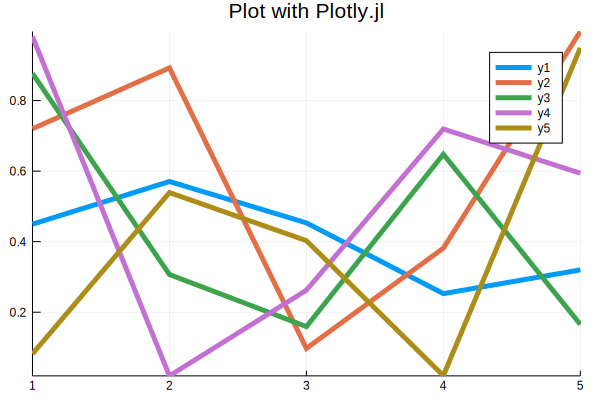

In [118]:
using Plots
#plotly() # Choose the Plotly.jl backend for web interactivity
plot(rand(5,5),linewidth=5,title="Plot with Plotly.jl")

In [119]:
Pkg.status()

2 required packages:
 - IJulia                        1.8.0
 - Plots                         0.17.0
28 additional packages:
 - BinDeps                       0.8.8
 - BinaryProvider                0.3.0
 - ColorTypes                    0.6.7
 - Colors                        0.8.2
 - Compat                        0.64.0
 - Conda                         0.7.1
 - Contour                       0.4.0
 - DataStructures                0.8.1
 - FixedPointNumbers             0.4.6
 - GR                            0.31.0
 - JSON                          0.17.2
 - MbedTLS                       0.5.8
 - Measures                      0.2.0
 - Missings                      0.2.9
 - NaNMath                       0.3.1
 - Nullables                     0.0.5
 - PlotThemes                    0.2.0
 - PlotUtils                     0.4.4
 - RecipesBase                   0.3.1
 - Reexport                      0.1.0
 - Requires                      0.4.3
 - SHA                           0.5.7
 - Showoff     

### Metaprogramming: The `quote\end` expression

There are two stages in Julia code execution:
- Parsing

- Evaluation

Metaprogramming means modifying the code after it has been parsed but before actual evaluation. 

In [120]:
a = quote
r=3
t=4
h=sqrt(r^2+t^2)    
end
:a

:a

In [121]:
eval(a)

5.0

In [122]:
a.args[end]

:(h = sqrt(r ^ 2 + t ^ 2))

In [123]:
fieldnames(a)

3-element Array{Symbol,1}:
 :head
 :args
 :typ 

In [124]:
a.args[end]=:(h=r*t)
eval(a)

12

### Macros

Macros provide a method to include generated code in the final body of a program. A macro maps a tuple of arguments to a returned expression, and the resulting expression is compiled directly rather than executed at runtime.

In [125]:
macro sayhello()
   return :( println("Hello, world!") )
end

@sayhello 

Hello, world!


## 5. References and More Online Resources

1. [Julia Documentation](https://docs.julialang.org/en/stable/index.html)
2. http://samuelcolvin.github.io/JuliaByExample/
3. http://math.mit.edu/~stevenj/Julia-cheatsheet.pdf
4. http://courses.csail.mit.edu/18.337/2017/
5. Beginning Julia Programming: For Engineers and Scientists, Sandeep Nagar, 2017 [https://link.springer.com/book/10.1007%2F978-1-4842-3171-5]